In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#installiamo tensorflow!
!pip install tensorflow

In [ ]:
#installo saeborn (può servire per grafici)
!pip install seaborn

In [ ]:
#importo tensorflow (e seaborn) e check della version di tf
import tensorflow as tf
print(tf.__version__)
import seaborn as sns

2.4.1


In [ ]:
dataset=pd.read_csv("patient-20201204-172212.csv")
dataset


,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-01
4,1,2,2,2,44,2,1,2,2,2,2,2,2,2,2,2,2,2,2,9999-99-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95834,2,2,2,2,59,97,2,2,2,2,2,2,2,2,2,2,99,3,2,9999-99-99
95835,2,2,2,2,50,97,1,2,2,1,1,2,2,2,1,2,99,3,2,9999-99-99
95836,1,2,2,2,65,2,2,2,2,2,1,2,2,2,2,2,99,3,2,9999-99-99
95837,1,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,1,3,97,9999-99-99


In [ ]:
#eliminiamo output != da 1 
dt = dataset[dataset["outcome"] == 1]
dt["outcome"].unique()
dt

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-01
9,2,1,97,2,55,97,1,2,1,2,1,2,2,1,2,2,99,1,97,9999-99-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,2,2,2,1,66,97,2,2,2,2,2,2,2,2,2,2,2,1,1,9999-99-99
95645,1,2,2,2,60,2,2,2,2,2,1,2,2,2,2,2,1,1,2,9999-99-99
95657,2,2,2,2,56,97,1,2,2,2,1,2,2,2,2,2,1,1,2,9999-99-99
95693,1,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99


In [ ]:
#creato una nuova colonna dummy: morto =1 non morto=0
dt["isdeath"]=dt["death_date"].map({'9999-99-99': 0})
dt["isdeath"] = dt["isdeath"].replace(np.nan, 1)
dt['isdeath'].dtype
dt

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,...,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date,isdeath
0,2,1,97,2,42,97,2,2,1,2,...,2,2,2,2,2,99,1,97,9999-99-99,0.0
1,1,1,97,2,51,2,2,2,2,2,...,2,2,2,2,2,99,1,97,9999-99-99,0.0
2,2,2,2,2,51,97,1,2,2,2,...,2,2,1,2,2,99,1,2,9999-99-99,0.0
3,2,2,2,2,57,97,1,2,2,2,...,2,2,2,2,2,99,1,2,2020-04-01,1.0
9,2,1,97,2,55,97,1,2,1,2,...,2,2,1,2,2,99,1,97,9999-99-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,2,2,2,1,66,97,2,2,2,2,...,2,2,2,2,2,2,1,1,9999-99-99,0.0
95645,1,2,2,2,60,2,2,2,2,2,...,2,2,2,2,2,1,1,2,9999-99-99,0.0
95657,2,2,2,2,56,97,1,2,2,2,...,2,2,2,2,2,1,1,2,9999-99-99,0.0
95693,1,1,97,2,48,2,2,2,2,2,...,2,2,2,2,2,99,1,97,9999-99-99,0.0


In [ ]:
#lavoro con variabile intubated, trasformo i dati ed elimino i dati non  disponibili
#frequency of variable.value_count 1 intubeted yes, 2 no
dt['intubated'].value_counts()
dt.loc[dt['intubated']>2,'intubated']=2 #tutti i numeri maggiori di 3 ora sono 2 quindi hannovalore no
#cambio valpori dummy-- 0 non intubato, 1 intubato
dt['intubated']=dt['intubated'].map({2: 0,1: 1})
dt['intubated'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    22480
1      991
Name: intubated, dtype: int64

In [ ]:
#lavoro con variabile copd, trasformo i dati ed elimino i dati non  disponibili
#frequency of variable.value_count 1 yes copd problems, 2 no problems
dt['copd'].value_counts()
dt.loc[dt['copd']>2,'copd']=2 #tutti i numeri maggiori di 3 ora sono 2 quindi hannovalore no
#cambio valpori dummy-- 0 non intubato, 1 intubato
dt['copd']=dt['copd'].map({2: 0,1: 1})
dt['copd'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    22893
1      578
Name: copd, dtype: int64

In [ ]:
#lavoro con variabile diabetes. 
#Ci sono dei valori non disponibili, li trasformo in non diabetici
#frequency of variable.value_count 1 diabeteici yes, 2 non diabetici
dt['diabetes'].value_counts()
dt.loc[dt['diabetes']>2,'diabetes']=2
#trasformo i dati dei diabetici in variabile dummy 1=diabetico, 0 non diabetico
dt['diabetes']= dt['diabetes'].map({2:0,1:1})
dt['diabetes'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    19123
1     4348
Name: diabetes, dtype: int64

In [ ]:
#lavoro con variabile pnumonia e la rendo dummy.Prima 1 yes pneuomnia , 2 pneuomnia
dt.loc[dt['pneumonia']>2,'pneumonia']=2
#trasforma la variabile in modo che abbia valori 1 se c'è polmonite, 0 se non c'è
dt['pneumonia']=dt['pneumonia'].map({2: 0,1: 1})
dt['pneumonia'].value_counts()


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    16590
1     6881
Name: pneumonia, dtype: int64

In [ ]:
#lavoro con variabile pnasthma: la rendo dummy ed modifico i dati not avialple
#Prima 1 yes astmha , 2 non astmga
dt.loc[dt['asthma']>2,'asthma']=2
#trasforma la variabile in modo che abbia valori 1 se c'è asma, 0 se non c'è asma
dt['asthma']=dt['asthma'].map({2: 0,1: 1})
dt['asthma'].value_counts()


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    22690
1      781
Name: asthma, dtype: int64

In [ ]:
#lavoro con variabile obesity: la rendo dummy ed modifico i dati not avialple
#Prima 1 yes obesity , 2 non obesity
dt.loc[dt['obesity']>2,'obesity']=2
#trasforma la variabile in modo che abbia valori 1 se c'è obesity, 0 se non c'è obesity
dt['obesity']=dt['obesity'].map({2: 0,1: 1})
dt['obesity'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    18531
1     4940
Name: obesity, dtype: int64

In [ ]:
#lavoro con variabile smoker: la rendo dummy ed modifico i dati not avialple
#Prima 1 yes smoker , 2 non smoker
dt.loc[dt['smoker']>2,'smoker']=2
#trasforma la variabile in modo che abbia valori 1 se il paziene è smoker
# 0 se non smoker 
dt['smoker']=dt['smoker'].map({2: 0,1: 1})

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#lavoro con variabile sex la rendo dummy(0,1) ed modifico i dati not avialple
#Prima 1 donna, 2 man
#rendo la variabile dummy 0 donna, 1 uomo
dt['sex']=dt['sex'].map({2:1,1:0})

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#lavoro con variabile immunosuppression: la rendo dummy ed modifico i dati not avialple
#Prima 1 yes immunosuppression , 2 non immunosuppression
dt['immunosuppression'].value_counts()
dt.loc[dt['immunosuppression']>2, 'immunosuppression']=2
#rendo la variabile dummy 0 non immunosuppression, 1 immunosuppression
dt['immunosuppression']=dt['immunosuppression'].map({2:0,1:1})

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#lavoro con variabile hypertension: la rendo dummy ed modifico i dati not avialple
#Prima 1 yes hypertension , 2 non hypertension
dt['hypertension'].value_counts()
dt.loc[dt['hypertension']>2, 'hypertension']=2
#rendo la variabile dummy 0 non immunosuppression, 1 immunosuppression
dt['hypertension']=dt['hypertension'].map({2:0,1:1})

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#lavoro con variabile cardiovascular: la rendo dummy ed modifico i dati not avialple
#Prima 1 yes cardiovascular , 2 non cardiovascular
dt['cardiovascular'].value_counts()
dt.loc[dt['cardiovascular']>2, 'cardiovascular']=2
#rendo la variabile dummy 0 non cardiovascular, 1 cardiovascular
dt['cardiovascular']=dt['cardiovascular'].map({2:0,1:1})

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#lavoro con variabile icu (terapia intensiva): la rendo dummy ed modifico i dati not avialple
#Prima 1 yes icu , 2 non icu
dt['icu'].value_counts()
dt.loc[dt['icu']>2, 'icu']=2
#rendo la variabile dummy 0 non icu, 1 icu
dt['icu']=dt['icu'].map({2:0,1:1})

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#variabile chronic_kidney_failure: trasformo in dummy ed modifico i dati not available
#Prima 1 = yes , 2 = no, 98/97 = not applicable
dt['chronic_kidney_failure'].value_counts()
dt.loc[dt['chronic_kidney_failure']>2, 'chronic_kidney_failure']=2
#rendo la variabile dummy 0 = no, 1 = yes
dt['chronic_kidney_failure']=dt['chronic_kidney_failure'].map({2:0,1:1})

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#resetto l'indice del dataframe in quanto abbiamo eliminato delle righe e l'indice non era aggioranto.
#adesso l'indice è aggiornato e le righe sono ordinate
dt.reset_index(drop=True)


,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,...,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date,isdeath
0,1,1,0,0,42,97,0,0,1,0,...,2,0,0,0,0,99,1,0,9999-99-99,0.0
1,0,1,0,0,51,2,0,0,0,0,...,2,0,0,0,0,99,1,0,9999-99-99,0.0
2,1,2,0,0,51,97,1,0,0,0,...,2,0,1,0,0,99,1,0,9999-99-99,0.0
3,1,2,0,0,57,97,1,0,0,0,...,2,0,0,0,0,99,1,0,2020-04-01,1.0
4,1,1,0,0,55,97,1,0,1,0,...,2,0,1,0,0,99,1,0,9999-99-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23466,1,2,0,1,66,97,0,0,0,0,...,2,0,0,0,0,2,1,1,9999-99-99,0.0
23467,0,2,0,0,60,2,0,0,0,0,...,2,0,0,0,0,1,1,0,9999-99-99,0.0
23468,1,2,0,0,56,97,1,0,0,0,...,2,0,0,0,0,1,1,0,9999-99-99,0.0
23469,0,1,0,0,48,2,0,0,0,0,...,2,0,0,0,0,99,1,0,9999-99-99,0.0


In [ ]:
dt1=dt
dt1=dt1.drop("pregnant",axis=1)
dt1=dt1.drop("outcome",axis=1)
dt1=dt1.drop("death_date",axis=1)
dt1=dt1.drop("patient_type",axis=1)
dt1=dt1.drop("other_diseases",axis=1)
dt1=dt1.drop("another_case",axis=1)
dt1

,sex,intubated,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,chronic_kidney_failure,smoker,icu,isdeath
0,1,0,0,42,0,0,1,0,0,0,0,0,0,0,0.0
1,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0.0
2,1,0,0,51,1,0,0,0,1,0,1,0,0,0,0.0
3,1,0,0,57,1,0,0,0,0,0,0,0,0,0,1.0
9,1,0,0,55,1,0,1,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,1,0,1,66,0,0,0,0,0,0,0,0,0,1,0.0
95645,0,0,0,60,0,0,0,0,1,0,0,0,0,0,0.0
95657,1,0,0,56,1,0,0,0,1,0,0,0,0,0,0.0
95693,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0.0


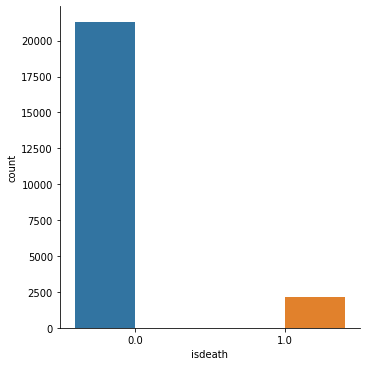

In [ ]:
fig=sns.catplot(x="isdeath", hue="isdeath", kind="count", data=dt)

In [ ]:
dtcot=pd.DataFrame(dt)
dtcot=dtcot.drop("outcome",axis=1)
dtcot=dtcot.drop("death_date",axis=1)
dtcot=dtcot.drop("patient_type",axis=1)
dtcot=dtcot.drop("other_diseases",axis=1)
dtcot=dtcot.drop("another_case",axis=1)
dtcot=dtcot.drop("pregnant",axis=1)
#dtcot=dtcot.drop("age",axis=1)
dtcot.astype('int64').dtypes

sex                       int64
intubated                 int64
pneumonia                 int64
age                       int64
diabetes                  int64
copd                      int64
asthma                    int64
immunosuppression         int64
hypertension              int64
cardiovascular            int64
obesity                   int64
chronic_kidney_failure    int64
smoker                    int64
icu                       int64
isdeath                   int64
dtype: object

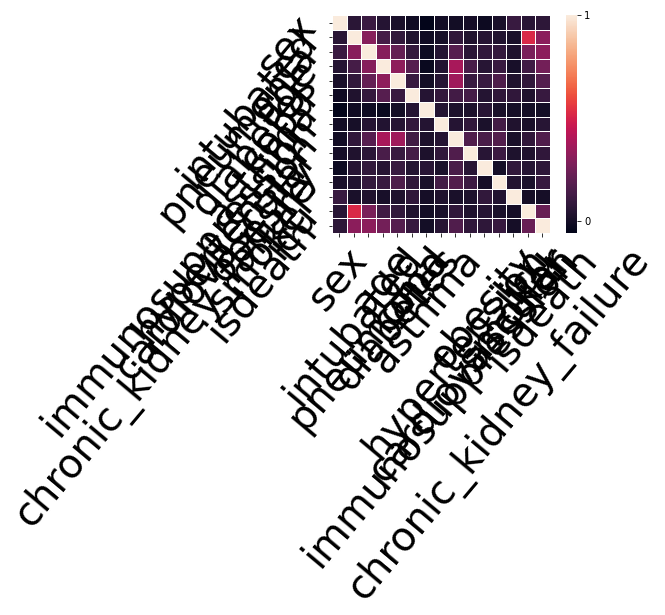

In [ ]:
corrMatrix = pd.DataFrame.corr(dtcot)
sns.heatmap(corrMatrix,square=True,linewidths=.5)
plt.rcParams["figure.figsize"] = (80,80)
plt.xticks(fontsize = 40,rotation=50)
plt.yticks(fontsize = 40,rotation=50)
sns.set(font_scale=10)
plt.show()

In [ ]:
#controllo: ci sono valori na nel dataset? 
dtcot.isna()
dtcot.isna().sum()
#non ci sono valori na!

sex                       0
intubated                 0
pneumonia                 0
age                       0
diabetes                  0
copd                      0
asthma                    0
immunosuppression         0
hypertension              0
cardiovascular            0
obesity                   0
chronic_kidney_failure    0
smoker                    0
icu                       0
isdeath                   0
dtype: int64

In [ ]:
#preprocessing
from sklearn import preprocessing
labe = preprocessing.LabelEncoder()
dtcot['isdeath'] = labe.fit_transform(dtcot['isdeath'])

In [ ]:
dtcot['sex'].unique()
dtcot['intubated'].unique()
dtcot['pneumonia'].unique()
dtcot['diabetes'].unique()
dtcot['copd'].unique()
dtcot['asthma'].unique()
dtcot['immunosuppression'].unique()
dtcot['hypertension'].unique()
dtcot['cardiovascular'].unique()
dtcot['obesity'].unique()
dtcot['chronic_kidney_failure'].unique()
dtcot['smoker'].unique()
dtcot['icu'].unique()
dtcot['isdeath'].unique()
dtcot

,sex,intubated,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,chronic_kidney_failure,smoker,icu,isdeath
0,1,0,0,42,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,51,1,0,0,0,1,0,1,0,0,0,0
3,1,0,0,57,1,0,0,0,0,0,0,0,0,0,1
9,1,0,0,55,1,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,1,0,1,66,0,0,0,0,0,0,0,0,0,1,0
95645,0,0,0,60,0,0,0,0,1,0,0,0,0,0,0
95657,1,0,0,56,1,0,0,0,1,0,0,0,0,0,0
95693,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#costruiamo la popolazione del training e del test (PER NICO:ho cambiato dataset per includere l'eta)
x = dt1.drop(['isdeath'],axis=1)
y = dt1['isdeath']

from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 50)

In [ ]:
xtrain=xtrain.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)
ytrain.shape[0]

18776

In [ ]:
#balancing the dataset, eliminando un po' di variabili con  target 0, in modo da avere uniforme distribuzione tra le variabili target 
#creaiamo un loop che elimini tutte le righe del dataset, che superando il numero di target1

num_one_target= int(np.sum(ytrain))
zero_target_count=0
indicies_toremove=[] #iniziamo il loop

for i in range (ytrain.shape[0]): 
   if ytrain[i]== 0:
       zero_target_count+= 1
       if zero_target_count>num_one_target:
          indicies_toremove.append(i)

indicies_toremove=np.array(indicies_toremove)

In [ ]:
xtrain=xtrain.drop(indicies_toremove,axis=0)
ytrain=ytrain.drop(indicies_toremove, axis=0)

In [ ]:
ytrain


0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
18747    1.0
18751    1.0
18763    1.0
18769    1.0
18773    1.0
Name: isdeath, Length: 3490, dtype: float64

In [ ]:
xtrain

,sex,intubated,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,chronic_kidney_failure,smoker,icu
0,0,0,0,39,0,0,0,0,0,0,0,0,0,0
1,0,0,1,77,0,0,0,1,0,0,0,0,0,1
2,1,0,1,47,0,0,0,0,1,0,0,1,1,0
3,1,1,1,34,0,0,0,0,0,0,0,0,0,0
4,0,0,0,69,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,1,0,1,58,0,0,0,0,0,0,0,0,0,0
18751,1,0,0,59,0,0,0,0,0,0,0,0,1,1
18763,1,1,1,51,0,0,0,0,0,0,0,1,0,1
18769,1,0,0,78,0,0,0,0,0,0,0,0,0,0


In [ ]:
#scaling dell'età
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain.iloc[:,3]=sc.fit_transform(np.reshape(np.array(xtrain.iloc[:,3]),(-1,1)))
xtest.iloc[:,3]=sc.transform(np.reshape(np.array(xtest.iloc[:,3]),(-1,1)))
xtest.iloc[:,3]

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


41349   -0.423241
74142    1.292547
80074    0.495932
11816    0.128263
50789   -1.403691
           ...   
70200   -0.300684
52091   -1.526247
58690   -0.300684
54275    0.618488
65249   -0.729631
Name: age, Length: 4695, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#n1
#definiamo il classificatore random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', max_depth=4, max_features='sqrt', n_estimators=100)

#facciamo il training
rfc.fit(xtrain, ytrain)
ypred=rfc.predict(xtest)

#matrice di confusione e accuratezza
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(ytest, ypred))
acc_rmfor=accuracy_score(ytest, ypred)
print(acc_rmfor)

#cross validation per random Forest
accuracies_rmf=cross_val_score(estimator=rfc, X=xtrain, y=ytrain, cv=10)
accuracies_cross_val_randomforest=accuracies_rmf.mean()*100
print("Accuracy rmf: {:2f} %".format(accuracies_rmf.mean()*100)) #fa la media delle accuacies calcolate prima
print("Standard deviation: {:2f} %".format(accuracies_rmf.std()*100)) #fa la media delle accuacies calcolate prima




[[3163 1123]
 [  90  319]]
0.741640042598509
Accuracy rmf: 78.051576 %
Standard deviation: 1.230425 %


In [ ]:
#2naive_bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)
y_predby=classifier.predict(xtest)
cm = confusion_matrix(ytest, y_predby)
acc_naive=accuracy_score(ytest, y_predby)
acc_naive
print(cm)
print(accuracy_score(ytest, y_predby))
accuracies=cross_val_score(estimator=classifier, X=xtrain, y=ytrain, cv=10)
accuracies_cross_val_naive=accuracies.mean()*100
print("Accuracy: {:2f} %".format(accuracies.mean()*100)) #fa la media delle accuacies calcolate prima
print("Standard deviation: {:2f} %".format(accuracies.std()*100)) #fa la media delle accuacies calcolate prima



[[3747  539]
 [ 217  192]]
0.8389776357827476
Accuracy: 68.538682 %
Standard deviation: 2.154911 %


In [ ]:
xtrainsize=xtrain.shape[0]
xtrainsize=int(xtrainsize*0.8)
xtrainann=xtrain.iloc[:xtrainsize]
ytrainann=xtrain[:xtrainsize]
validationtrain=xtrain[xtrainsize:]
validationtargets=ytrain[xtrainsize:]

In [ ]:
#importiamo funzione per early stopping utile a prevenire l'overfitting dell'ann
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#iniziamo con una  rete neurale

num_units=xtrain.shape[0]
hidden_layer_size=6
output_size=2
ann=tf.keras.models.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
])
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#sparse_categorical_crossentropy applica il one hot ecnoding ai dati

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
batch_size=10
numepoch=150
ann.fit(xtrain,ytrain,
        batch_size=batch_size,
        epochs=numepoch,
        callbacks=[early_stopping],
        validation_data=(validationtrain,validationtargets),verbose=2
        )


Epoch 1/150
349/349 - 3s - loss: 0.6864 - accuracy: 0.5524 - val_loss: 0.6914 - val_accuracy: 0.7593
Epoch 2/150
349/349 - 0s - loss: 0.5895 - accuracy: 0.7304 - val_loss: 0.6212 - val_accuracy: 0.8596
Epoch 3/150
349/349 - 0s - loss: 0.5329 - accuracy: 0.7653 - val_loss: 0.5860 - val_accuracy: 0.8309
Epoch 4/150
349/349 - 0s - loss: 0.5005 - accuracy: 0.7799 - val_loss: 0.5121 - val_accuracy: 0.8539
Epoch 5/150
349/349 - 0s - loss: 0.4855 - accuracy: 0.7797 - val_loss: 0.4852 - val_accuracy: 0.8481
Epoch 6/150
349/349 - 0s - loss: 0.4769 - accuracy: 0.7802 - val_loss: 0.4762 - val_accuracy: 0.8453
Epoch 7/150
349/349 - 0s - loss: 0.4721 - accuracy: 0.7817 - val_loss: 0.4332 - val_accuracy: 0.8653
Epoch 8/150
349/349 - 0s - loss: 0.4682 - accuracy: 0.7851 - val_loss: 0.4354 - val_accuracy: 0.8653
Epoch 9/150
349/349 - 0s - loss: 0.4648 - accuracy: 0.7845 - val_loss: 0.4586 - val_accuracy: 0.8510
Epoch 10/150
349/349 - 0s - loss: 0.4610 - accuracy: 0.7825 - val_loss: 0.3959 - val_accura

In [ ]:
test_model,test_accuracy=ann.evaluate(xtest,ytest)
#solitmaent l'accuratezza del modello non è molto lontana dalla validation_accuracy, e solitamente è inferiroe

147/147 [==============================] - 0s 804us/step - loss: 0.4894 - accuracy: 0.7148


In [ ]:
y_pred_ann= ann.predict(xtest) #le predizioni sono array con due elementi a rig, ogni elemento ha la probabilità di una delle due classe
rounded_predictions=np.argmax(y_pred_ann, axis=-1) #arrotondiamo le predizioni facendo si che abbiano un solo valore per irga e non due , cos' sono confrontabili con il target
print(confusion_matrix(ytest, rounded_predictions))
acc_ann=accuracy_score(ytest, rounded_predictions)
acc_ann

[[3018 1268]
 [  71  338]]


0.7148029818956336

In [ ]:
y_pred_ann= ann.predict_proba(xtest)
y_pred_ann


/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.8760755 , 0.12392443],
       [0.19420242, 0.8057976 ],
       [0.27177462, 0.72822547],
       ...,
       [0.69163907, 0.3083609 ],
       [0.6565547 , 0.3434452 ],
       [0.9141014 , 0.08589856]], dtype=float32)

In [ ]:
#metodo del KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)
print(confusion_matrix(ytest, ypred_knn))
acc_knn=accuracy_score(ytest, ypred_knn)
acc_knn

[[3248 1038]
 [ 106  303]]


0.7563365282215122

In [ ]:
#metodo del Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=0.025)
svm.fit(xtrain, ytrain)
#supp vetro machine

ypred_svm = svm.predict(xtest)
ypred_svm
ypred_svm = svm.predict(xtest)
print(confusion_matrix(ytest, ypred_svm))
accsvm=accuracy_score(ytest, ypred_svm)
accsvm

[[2922 1364]
 [  75  334]]


0.693503727369542

In [ ]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred_clf = clf.predict(xtest)
print(confusion_matrix(ytest, ypred_clf))
accdectree=accuracy_score(ytest, ypred_clf)
accdectree

[[3243 1043]
 [ 144  265]]


0.7471778487752929

In [ ]:
#Proviamo AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(xtrain, ytrain)
ypred_ada = ada.predict(xtest)
print(confusion_matrix(ytest, ypred_ada))
acc_adaboost=accuracy_score(ytest, ypred_ada)
acc_adaboost

[[3320  966]
 [ 109  300]]


0.7710330138445154

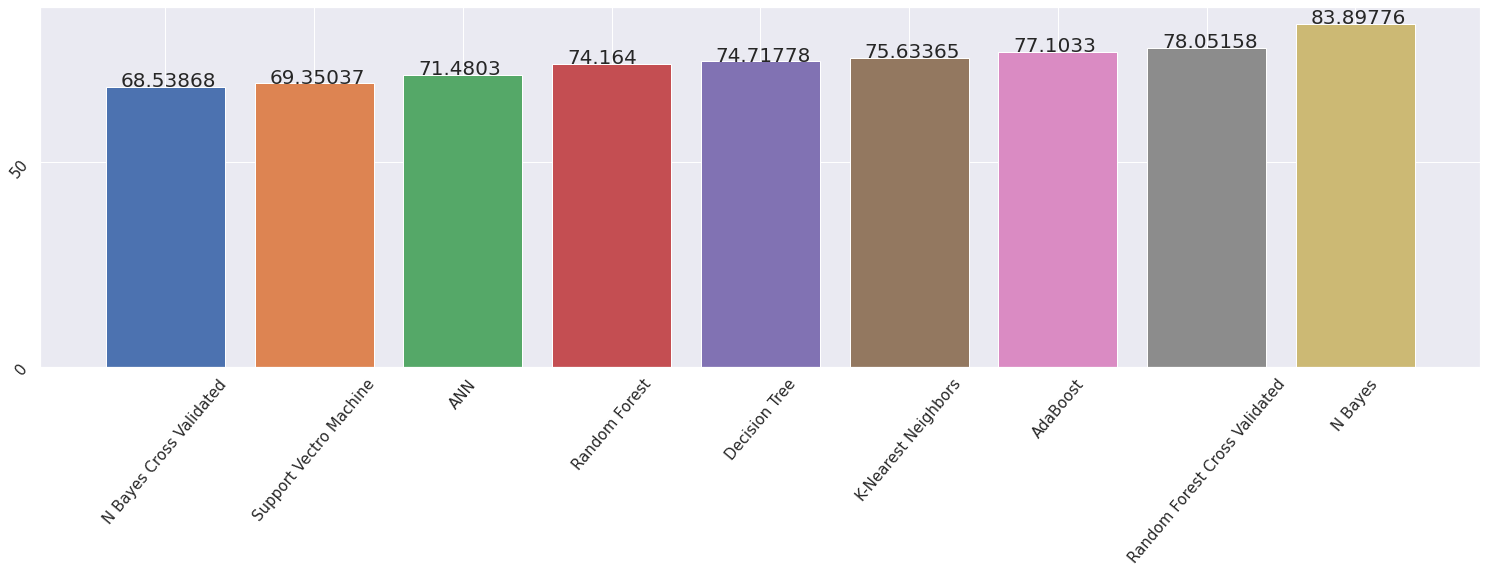

In [ ]:
models=['Decision Tree','Random Forest','Random Forest Cross Validated','N Bayes', 'N Bayes Cross Validated', 'K-Nearest Neighbors','Support Vectro Machine', 'AdaBoost', 'ANN']
accuracy=[accdectree,acc_rmfor,accuracies_cross_val_randomforest,acc_naive,accuracies_cross_val_naive, acc_knn, accsvm,acc_adaboost,acc_ann]
accuracy
d = {'Models': models, 'accuracy': accuracy}
acc_frame = pd.DataFrame(data=d)
# boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
acc_frame.loc[acc_frame['accuracy']<1,'accuracy']=acc_frame['accuracy']*100
acc_frame=acc_frame.sort_values(by=['accuracy'])

#drow bar plot
ax.bar(acc_frame['Models'],acc_frame['accuracy'],color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8'])
plt.gcf().set_size_inches(20, 5)
plt.xticks(fontsize = 15,rotation=50)
plt.yticks(fontsize = 15,rotation=50)#acc_frame

for index, value in enumerate(acc_frame['accuracy']):
    plt.text(index -0.3,value, str(round(value,5)),fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies=cross_val_score(estimator=knn, X=xtrain, y=ytrain, cv=10)
print(accuracies)
print("Accuracy: {:2f} %".format(accuracies.mean()*100)) #fa la media delle accuacies calcolate prima
print("Standard deviation: {:2f} %".format(accuracies.std()*100)) #fa la media delle accuacies calcolate prima


[0.76790831 0.80802292 0.77363897 0.75071633 0.77936963 0.74498567
 0.78223496 0.75644699 0.79083095 0.77077364]
Accuracy: 77.249284 %
Standard deviation: 1.804020 %


In [ ]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [ ]:
y_probas = np.array(classifier.predict_proba(xtest))
print(y_probas[::,0])

[0.99921532 0.27579666 0.92868516 ... 0.99775834 0.99764989 0.99944982]


In [ ]:
pip install metrics

     |████████████████████████████████| 841 kB 38.8 MB/s 
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17814 sha256=bfe5910743231290199f417369b67e9ef4255115350ce8eb48045e81b143e717
  Stored in directory: /root/.cache/pip/wheels/54/98/67/aa136e6754d2105b31e0f43c72a208c94d812c9e1d9f18d971
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24228 sha256=4e5edc85c1a983e62576b3add5c532a8c42e1b1865b10e770351f32458dad173
  Stored in directory: /root/.cache/pip/wheels/09/97/ce/98234adaab0cf5b2c3a1b6610ada24e6f7ab3675fff4e0b8b2
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.8.1
    Uninstalling Pygments-2.8.1:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: '/shared-libs/python3.7/py-core/bin/pygmentize'

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

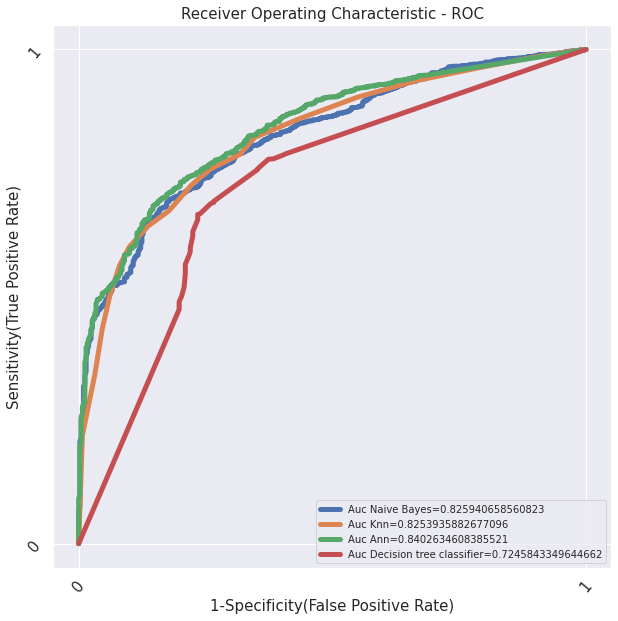

In [ ]:
#y_true = # ground truth labels
#ypred_clf = # predicted probabilities generated by sklearn classifier


y_probas_nb= np.array(classifier.predict_proba(xtest))
fpr, tpr, thresholds = metrics.roc_curve(np.array(ytest), y_probas_nb[::,0], pos_label=0)

y_probasknn = np.array(knn.predict_proba(xtest))
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(np.array(ytest), y_probasknn[::,0], pos_label=0)

y_pred_ann
fpr_ann, tpr_ann, thresholds_ann = metrics.roc_curve(np.array(ytest), y_pred_ann[::,0], pos_label=0)

y_proba_clf=clf.predict_proba(xtest)
fpr_clf, tpr_clf, thresholds_clf = metrics.roc_curve(np.array(ytest), y_proba_clf[::,0], pos_label=0)

#y_proba_svm=svm.predict_proba(xtest)
#fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(np.array(ytest), y_proba_svm[::,0], pos_label=0)


auc_nb= metrics.roc_auc_score(ytest, y_probas[::,1])
auc_knn = metrics.roc_auc_score(ytest, y_probasknn[::,1])
auc_ann = metrics.roc_auc_score(ytest, y_pred_ann[::,1])
auc_clf=  metrics.roc_auc_score(ytest, y_proba_clf[::,1])
#auc_svm=  metrics.roc_auc_score(ytest, y_proba_svm[::,1])

plt.plot(fpr,tpr,label="Auc Naive Bayes="+str(auc_nb),linewidth=5)
plt.plot(fpr_knn,tpr_knn,label="Auc Knn="+str(auc_knn), linewidth=5)
plt.plot(fpr_ann,tpr_ann,label="Auc Ann="+str(auc_ann), linewidth=5)
plt.plot(fpr_clf, tpr_clf,label="Auc Decision tree classifier="+str(auc_clf), linewidth=5)
#plt.plot(fpr_svm, tpr_svm,label="Auc SVM="+str(auc_svm), linewidth=10)


plt.xlabel('1-Specificity(False Positive Rate)',fontsize=15)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic - ROC',fontsize=15)
plt.legend(loc="lower right", fontsize=10)
plt.gcf().set_size_inches(10, 10)
plt.xticks(fontsize = 15,rotation=50)
plt.yticks(fontsize = 15,rotation=50)#acc_frame
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0dc3793f-35f9-4859-a7e1-3ba4252e3bfe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>